In [17]:
import pandas as pd
import numpy as np
import os
import string
import matplotlib.pyplot as plt
import seaborn as sns
os.getcwd()
os.chdir('C:/Users/peiyaozhao/Documents/GitHub/tracking-msa-ghg/bin/jupyter')

In [18]:
df_emissions = pd.read_excel('C:/Users/peiyaozhao/Documents/GitHub/tracking-msa-ghg/data/mobile-forecast/Public GHG data 1990-2021.xlsx', sheet_name='Emission Totals')
df_population = pd.read_csv('C:/Users/peiyaozhao/Documents/GitHub/tracking-msa-ghg/data/mobile-forecast/connecticut-population-2023-11-08.csv')
df_vmt = pd.read_csv('C:/Users/peiyaozhao/Documents/GitHub/tracking-msa-ghg/data/mobile-forecast/dvmt-CT-summary.csv')
#df_MSA_DVMT = pd.read_csv('C:/Users/peiyaozhao/Documents/GitHub/tracking-msa-ghg/data/raw/Miles-and-DVMT-by-County-and-Functional-Class-2022.csv')#this generate lsit, list has no following function but have to convert it to dataframe
#df_population = pd.read_excel('C:/Users/peiyaozhao/Documents/GitHub/tracking-msa-ghg/data/raw/ACSDP5Y2021.DP05-2023-09-11T201858.xlsx', sheet_name='Data')
df_emissions

,Sector Emissions (MMTCO2e),1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2016,2017,2018,2019,2020 est,2021 (ESTIMATE),2021 % of Total Emissions,% change from 1990,% change from last year,% change from 2001
0,Agriculture,0.375261,0.348502,0.389088,0.415000,0.408122,0.400748,0.344938,0.348057,0.375380,...,0.339883,0.341291,0.350344,0.369979,0.346028,0.350000,0.010075,-0.067316,0.011480,-0.062704
1,Natural Gas Leakage,0.794155,0.762277,0.747679,0.720340,0.695204,0.668485,0.638662,0.614303,0.588198,...,0.245919,0.243363,0.240438,0.241217,0.240000,0.240000,0.006909,-0.697792,0.000000,-0.532010
2,Commercial,3.828568,3.662331,4.312955,3.843474,4.172272,3.841800,4.133427,4.301810,4.036593,...,3.907677,3.920870,4.329612,4.196598,3.824505,4.001450,0.115189,0.045156,0.046266,-0.073598
3,Commercial (CO2FFC),3.802622,3.636449,4.283215,3.814070,4.142831,3.813977,4.103763,4.273123,4.010713,...,3.885436,3.898378,4.306234,4.173702,3.803173,3.979450,0.114555,0.046502,0.046350,-0.072990
4,Commercial (Stationary),0.025946,0.025882,0.029740,0.029404,0.029441,0.027823,0.029664,0.028687,0.025880,...,0.022242,0.022492,0.023378,0.022896,0.021332,0.022000,0.000633,-0.152093,0.031333,-0.171856
5,Electric Power (Consumption),11.908703,12.015808,11.282676,10.228667,10.395885,10.320433,10.734700,13.201970,12.948870,...,9.289161,8.501146,8.066976,5.690000,3.200000,3.040000,0.087512,-0.744725,-0.050000,-0.753715
6,Electric Power (Generation),12.125818,11.775872,9.771757,8.650563,8.513378,9.737109,11.311067,14.507413,13.348240,...,8.574717,7.866282,9.589895,9.523774,10.206000,10.955000,0.315358,-0.096556,0.073388,-0.040398
7,CO2 (EIA State Energy Profile),12.084447,11.736217,9.738805,8.621568,8.485521,9.707468,11.276329,14.462553,13.308563,...,8.558718,7.854365,9.574281,9.510000,10.186000,10.940000,0.314926,-0.094704,0.074023,-0.038865
8,CH4 and N2O (Stationary),0.041371,0.039655,0.032952,0.028995,0.027857,0.029641,0.034738,0.044860,0.039677,...,0.015998,0.011917,0.015615,0.013774,0.020000,0.015000,0.000432,-0.637431,-0.250000,-0.556474
9,Industrial,3.001041,3.100758,3.355918,3.447719,3.150548,3.103303,3.257568,3.266450,3.119599,...,3.152446,3.123419,3.137983,3.146549,3.128899,3.376378,0.097195,0.125069,0.079094,0.011279


In [19]:
#mobile emissions from 1990 to 2021, MMTCO2e
mobile_emi = df_emissions.loc[16][1:33]
agriculture = df_emissions.loc[0][1:33]
commercial = df_emissions.loc[2][1:33]
electricity = df_emissions.loc[5][1:33]
industrial = df_emissions.loc[9][1:33]
Residential = df_emissions.loc[13][1:33]
solidWaste = df_emissions.loc[20][1:33]
wastewater = df_emissions.loc[21][1:33]



result = mobile_emi.to_frame()
result = result.reset_index()
agriculture.reset_index(drop=True, inplace=True)
commercial.reset_index(drop=True, inplace=True)
electricity.reset_index(drop=True, inplace=True)
industrial.reset_index(drop=True, inplace=True)
Residential.reset_index(drop=True, inplace=True)
solidWaste.reset_index(drop=True, inplace=True)
wastewater.reset_index(drop=True, inplace=True)
result['Agriculture GHG Emissions (MMTCO2e)']=agriculture
result['Commercial GHG Emissions (MMTCO2e)']=commercial
result['Electricity GHG Emissions (MMTCO2e)']=electricity
result['Industrial GHG Emissions (MMTCO2e)']=industrial
result['Residential GHG Emissions (MMTCO2e)']=Residential
result['Solidwaste GHG Emissions (MMTCO2e)']=solidWaste
result['Wastewater GHG Emissions (MMTCO2e)']=wastewater
result

,index,16,Agriculture GHG Emissions (MMTCO2e),Commercial GHG Emissions (MMTCO2e),Electricity GHG Emissions (MMTCO2e),Industrial GHG Emissions (MMTCO2e),Residential GHG Emissions (MMTCO2e),Solidwaste GHG Emissions (MMTCO2e),Wastewater GHG Emissions (MMTCO2e)
0,1990,15.120625,0.375261,3.828568,11.908703,3.001041,8.279021,1.065912,0.359842
1,1991,15.005884,0.348502,3.662331,12.015808,3.100758,8.024783,1.113482,0.361827
2,1992,15.086747,0.389088,4.312955,11.282676,3.355918,9.505435,1.242805,0.362378
3,1993,15.146864,0.415,3.843474,10.228667,3.447719,9.081525,1.209374,0.363307
4,1994,15.066461,0.408122,4.172272,10.395885,3.150548,8.677775,1.237386,0.365658
5,1995,14.815692,0.400748,3.8418,10.320433,3.103303,7.977389,1.249919,0.365747
6,1996,15.623592,0.344938,4.133427,10.7347,3.257568,8.461561,1.268976,0.367926
7,1997,15.67985,0.348057,4.30181,13.20197,3.26645,8.18612,1.615209,0.36852
8,1998,15.917011,0.37538,4.036593,12.94887,3.119599,7.122707,1.526577,0.371087
9,1999,17.112669,0.3748,4.290578,12.210134,3.236276,8.041005,1.455471,0.37503


In [20]:
df_vmt = df_vmt.drop(0)
df_vmt = df_vmt.reset_index()
#df_vmt = df_vmt.drop(32)

In [21]:
# Create a new row to insert
new_row = pd.Series({'Unnamed: 0': 1995, 'NewColumn': 76830000, '0':'NaN'})

# Specify the position where you want to insert the row (in this case, before the second row)
position = 27

# Split the DataFrame into two parts based on the specified position
df_vmt_before = df_vmt.loc[:position - 1]
df_vmt_after = df_vmt.loc[position:]

# Concatenate the parts with the new row in between
df_vmt = pd.concat([df_vmt_before, pd.DataFrame([new_row]), df_vmt_after], ignore_index=True)
df_vmt

,index,Unnamed: 0,NewColumn,0
0,1.0,2022,81277576,NaN
1,2.0,2021,79420671,NaN
2,3.0,2020,81543552,NaN
3,4.0,2019,86577672,NaN
4,5.0,2018,86563582,NaN
5,6.0,2017,86301543,NaN
6,7.0,2016,86444182,NaN
7,8.0,2015,86552865,NaN
8,9.0,2014,85452919,NaN
9,10.0,2013,84770376,NaN


In [22]:
popu = df_population.loc[105:136]
popu_reindexed = popu.reset_index(drop=True)
popu_reindexed

,Macrotrends Data Download,Unnamed: 1,Unnamed: 2
0,12/1/1990,3289056,0.17
1,12/1/1991,3288640,-0.01
2,12/1/1992,3274997,-0.41
3,12/1/1993,3272325,-0.08
4,12/1/1994,3268346,-0.12
5,12/1/1995,3265293,-0.09
6,12/1/1996,3267030,0.05
7,12/1/1997,3268514,0.05
8,12/1/1998,3272563,0.12
9,12/1/1999,3282031,0.29


In [23]:
df_vmt["NewColumn"] = df_vmt["NewColumn"].values[::-1]
df_vmt["Unnamed: 0"] = df_vmt["Unnamed: 0"].values[::-1]
df_vmt

,index,Unnamed: 0,NewColumn,0
0,1.0,1990,72072000,NaN
1,2.0,1991,72948000,NaN
2,3.0,1992,72293000,NaN
3,4.0,1993,74025000,NaN
4,5.0,1994,74352000,NaN
5,6.0,1995,76830000,NaN
6,7.0,1996,76874000,NaN
7,8.0,1997,78202000,NaN
8,9.0,1998,79936000,NaN
9,10.0,1999,81630000,NaN


In [24]:
#df_vmt = df_vmt.drop(0)
#df_vmt = df_vmt.reset_index()
#df_vmt = df_vmt.drop(32)
df_vmt

,index,Unnamed: 0,NewColumn,0
0,1.0,1990,72072000,NaN
1,2.0,1991,72948000,NaN
2,3.0,1992,72293000,NaN
3,4.0,1993,74025000,NaN
4,5.0,1994,74352000,NaN
5,6.0,1995,76830000,NaN
6,7.0,1996,76874000,NaN
7,8.0,1997,78202000,NaN
8,9.0,1998,79936000,NaN
9,10.0,1999,81630000,NaN


In [25]:
result['Population'] = popu_reindexed['Unnamed: 1']
result['DVMT (Miles)'] = df_vmt['NewColumn']

In [26]:
new_column_index = ['Year', 'Mobile GHG Emissions (MMTCO2e)', 'Agriculture GHG Emissions (MMTCO2e)', 'Commercial GHG Emissions (MMTCO2e)', 'Electricity GHG Emissions (MMTCO2e)',
                    'Industrial GHG Emissions (MMTCO2e)', 'Residential GHG Emissions (MMTCO2e)', 'Solidwaste GHG Emissions (MMTCO2e)', 'Wastewater GHG Emissions (MMTCO2e)','Population', 'DVMT (Miles)']
#result.set_axis(new_column_index, axis=1)
result.rename(columns=dict(zip(result.columns, new_column_index)), inplace=True) #pandas version is old and cannot use the set_axis function
result.at[31, 'Year'] = 2021
result.at[30, 'Year'] = 2020
result

result.to_csv('../../data/mobile-forecast/emissions-populations-dvmt.csv')


In [27]:
#introduction: Time Series modeling is a powerful technique that acts as a gateway to understanding and forecasting trends and patterns.
result

,Year,Mobile GHG Emissions (MMTCO2e),Agriculture GHG Emissions (MMTCO2e),Commercial GHG Emissions (MMTCO2e),Electricity GHG Emissions (MMTCO2e),Industrial GHG Emissions (MMTCO2e),Residential GHG Emissions (MMTCO2e),Solidwaste GHG Emissions (MMTCO2e),Wastewater GHG Emissions (MMTCO2e),Population,DVMT (Miles)
0,1990,15.120625,0.375261,3.828568,11.908703,3.001041,8.279021,1.065912,0.359842,3289056,72072000
1,1991,15.005884,0.348502,3.662331,12.015808,3.100758,8.024783,1.113482,0.361827,3288640,72948000
2,1992,15.086747,0.389088,4.312955,11.282676,3.355918,9.505435,1.242805,0.362378,3274997,72293000
3,1993,15.146864,0.415,3.843474,10.228667,3.447719,9.081525,1.209374,0.363307,3272325,74025000
4,1994,15.066461,0.408122,4.172272,10.395885,3.150548,8.677775,1.237386,0.365658,3268346,74352000
5,1995,14.815692,0.400748,3.8418,10.320433,3.103303,7.977389,1.249919,0.365747,3265293,76830000
6,1996,15.623592,0.344938,4.133427,10.7347,3.257568,8.461561,1.268976,0.367926,3267030,76874000
7,1997,15.67985,0.348057,4.30181,13.20197,3.26645,8.18612,1.615209,0.36852,3268514,78202000
8,1998,15.917011,0.37538,4.036593,12.94887,3.119599,7.122707,1.526577,0.371087,3272563,79936000
9,1999,17.112669,0.3748,4.290578,12.210134,3.236276,8.041005,1.455471,0.37503,3282031,81630000


In [26]:
#perform a heat map of the correlation between each variables
columns_of_interest = ['GHG Emissions (MMTCO2e)', 'Population', 'DVMT (Miles)']

# Subset the DataFrame to include only the columns of interest
subset_df = result[columns_of_interest]

# Calculate the correlation matrix for the selected columns
correlation_matrix = subset_df.corr()


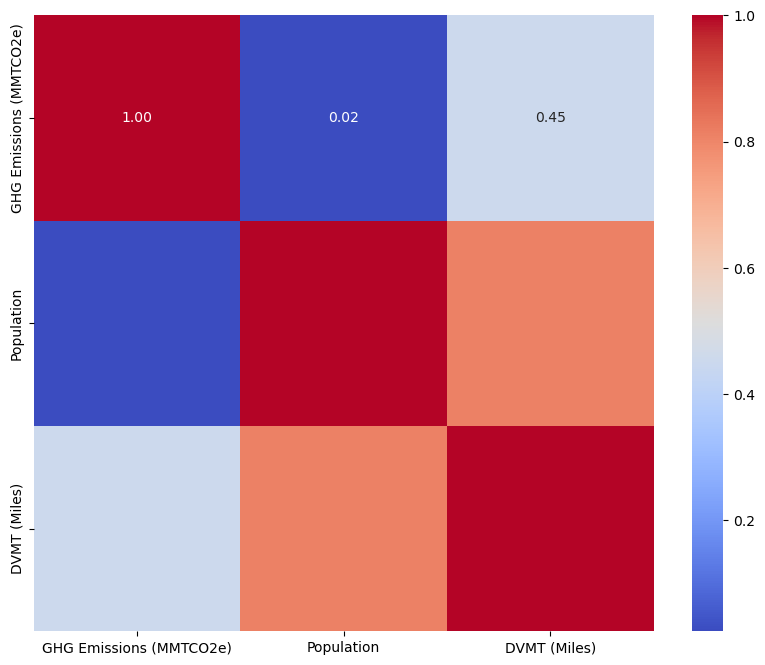

<Figure size 640x480 with 0 Axes>

In [27]:
correlation_matrix 
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size": 10})
plt.show()
plt.savefig('C:/Users/peiyaozhao/Documents/GitHub/tracking-msa-ghg/figures/heatmap.png', bbox_inches='tight')

In [28]:
#emission related with DVMT, population related to DVMT but not related to emissions

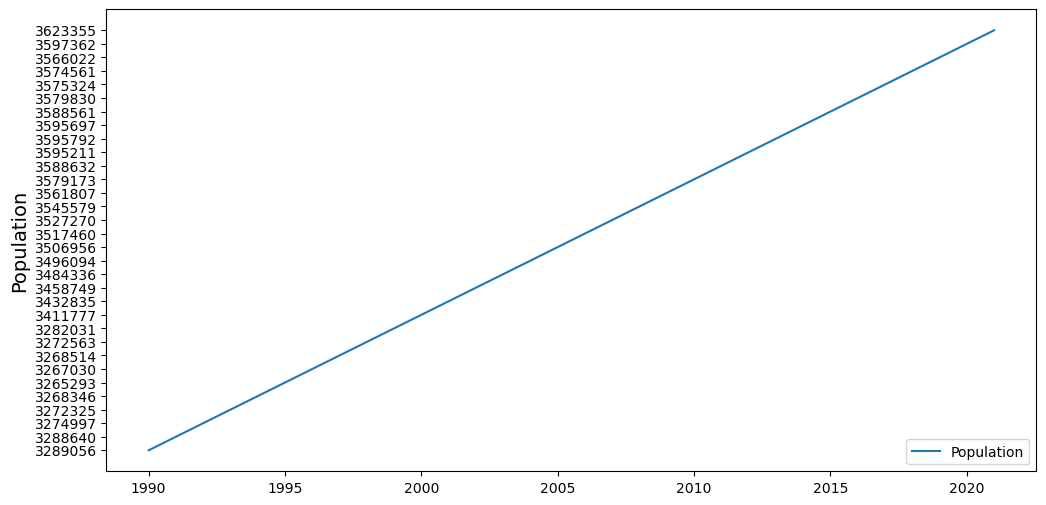

In [29]:
plt.figure(figsize=(12, 6))

plt.plot(result['Year'], result['Population'], label='Population')

#plt.xlabel('Year')
plt.ylabel('Population',fontsize=14)
#plt.title('Time Series Plot')
plt.legend(loc='lower right')
plt.savefig('C:/Users/peiyaozhao/Documents/GitHub/tracking-msa-ghg/figures/ct-population.png', bbox_inches='tight')

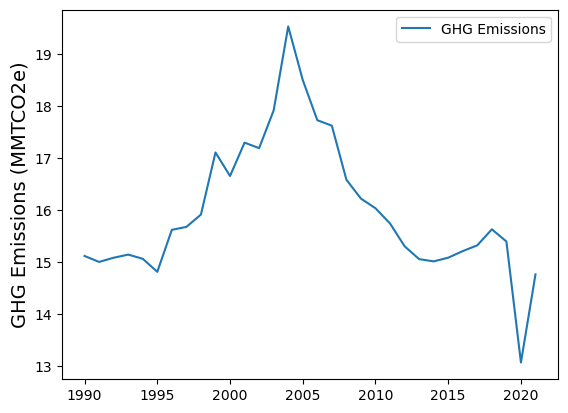

In [30]:
plt.plot(result['Year'], result['GHG Emissions (MMTCO2e)'], label='GHG Emissions')
#plt.xlabel('Year')
plt.ylabel('GHG Emissions (MMTCO2e)',fontsize=14)
#plt.title('Time Series Plot')
plt.legend(loc='upper right')
plt.savefig('C:/Users/peiyaozhao/Documents/GitHub/tracking-msa-ghg/figures/ct-ghg-emissions.png', bbox_inches='tight')

In [32]:
plt.plot(result['Year'], result['DVMT (Miles)']/1000000, label='DVMT (Miles)')
#plt.xlabel('Year')
plt.ylabel('DVMT (Million miles)',fontsize=14)
#plt.title('Time Series Plot')
plt.legend(loc='lower right')
plt.savefig('C:/Users/peiyaozhao/Documents/GitHub/tracking-msa-ghg/figures/ct-historical-vmt.png', bbox_inches='tight')

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [140]:
age_dtype

dtype('O')

In [148]:
result['GHG Emissions (MMTCO2e)']

0     15.120625
1     15.005884
2     15.086747
3     15.146864
4     15.066461
5     14.815692
6     15.623592
7      15.67985
8     15.917011
9     17.112669
10    16.658678
11    17.301097
12    17.195188
13    17.921412
14    19.535977
15    18.506215
16    17.733149
17    17.626947
18    16.587534
19    16.224746
20    16.038716
21    15.745639
22    15.308146
23    15.060186
24    15.016348
25    15.087477
26     15.21436
27    15.325243
28     15.63322
29    15.399656
30    13.071437
31    14.766522
Name: GHG Emissions (MMTCO2e), dtype: object